In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define input training data and parameter

In [2]:
input_signal_num = 1000000 # number of training data
input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
mean_w = 0.0 # mean of noise
std_w = 1.0 # std of noise
k = 0.2

# Define encoder and decoder (all in one network)

In [3]:
# input x
x = tf.placeholder(tf.float32, [None, 1])

# first neural network (encoder)
l1 = tf.layers.dense(inputs = x, units = 512, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l2 = tf.layers.dense(inputs = l1, units = 256, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l3_a = tf.layers.dense(inputs = l2, units = 128, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l3_ab = tf.layers.dense(inputs = l3_a, units = 64, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of first neural network
u1 = tf.layers.dense(inputs = l3_ab, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

# gaussian noise
w = tf.random_normal([input_signal_num, 1], mean=mean_w, stddev=std_w, dtype=tf.float32, seed=None)

# add u1 with gaussian noise
y = tf.add(u1, w)

# second neural network (decoder)
l3 = tf.layers.dense(inputs = y, units = 512, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l4 = tf.layers.dense(inputs = l3, units = 256, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l5_a = tf.layers.dense(inputs = l4, units = 128, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l5_ab = tf.layers.dense(inputs = l5_a, units = 64, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of second neural network
u2 = tf.layers.dense(inputs = l5_ab, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

# Define loss function

In [4]:
loss = k * tf.reduce_mean(tf.square(u1 - x)) + tf.reduce_mean(tf.square(u2 - u1)) # k(u1-x)^2+(u2-u1)^2
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
x_axis = np.array([np.linspace(-15, 15, num=input_signal_num).tolist()]).T

# Before optimization with loss function

In [7]:
y_axis = sess.run(u1, feed_dict = {x:x_axis})

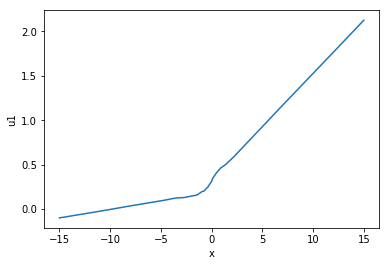

In [8]:
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('u1')
plt.show()

In [9]:
saver=tf.train.Saver()
saver.restore(sess,"model.ckpt")

INFO:tensorflow:Restoring parameters from model.ckpt


# After optimization with loss

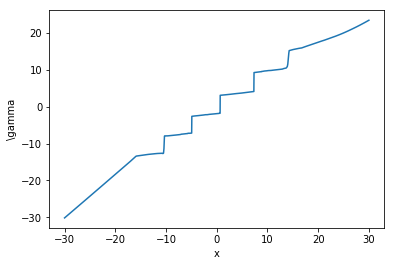

In [12]:
x_axis = np.array([np.linspace(-30, 30, num=input_signal_num).tolist()]).T
y_axis = sess.run(u1, feed_dict = {x:x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('\gamma')
plt.show()